## Exploratory Data Analysis on IRIS Dataset

### Iris Dataset : https://www.kaggle.com/uciml/iris

### importing all the libraries that are necessary

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### importing iris dataset

In [2]:
iris=pd.read_csv("iris.csv")

In [3]:
#see how many number of rows and columns present in iris dataset
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [4]:
# see the top 5 rows 
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [5]:
# see how many data points and features in a dataset
iris.shape

(150, 5)

In [6]:
# what are the column names in a dataset
iris.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [7]:
# renaming the column name variety to species
iris=iris.rename(columns={"variety":"species"})

In [8]:
iris.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'species'],
      dtype='object')

In [9]:
# How many data points for each class are represent?
iris["species"].value_counts()

Setosa        50
Versicolor    50
Virginica     50
Name: species, dtype: int64

In [10]:
# To see the detailed information of a dataset
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Univariate Analysis

Univariate Analysis means one variable Analysis. In Iris here we are four variables name sepal.length, sepal.width, petal.length and petal.width, Now let us see which of these variables are more useful.

### Histograms


In [11]:
iris_setosa = iris.loc[iris["species"] == "setosa"]
iris_virginica = iris.loc[iris["species"] == "virginica"]
iris_versicolor = iris.loc[iris["species"] == "versicolor"]

In [12]:
iris_setosa

,sepal.length,sepal.width,petal.length,petal.width,species


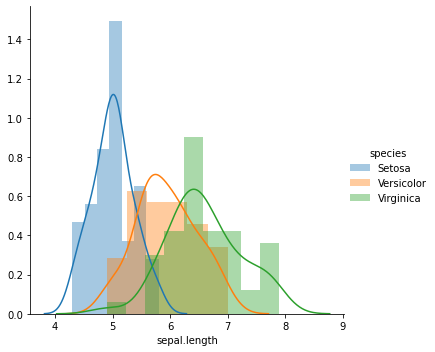

In [13]:
sns.FacetGrid(iris,hue="species",height=5).map(sns.distplot,"sepal.length").add_legend()

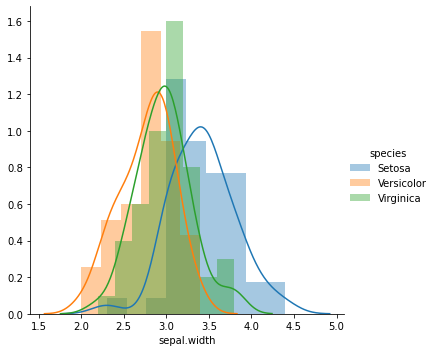

In [14]:
sns.FacetGrid(iris,hue="species",height=5).map(sns.distplot,"sepal.width").add_legend()

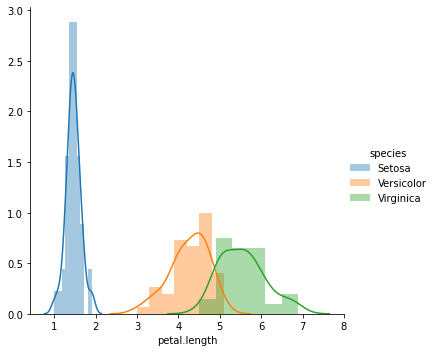

In [15]:
sns.FacetGrid(iris, hue="species",height=5).map(sns.distplot,"petal.length").add_legend()

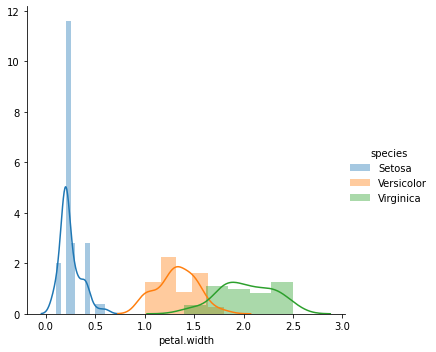

In [16]:
sns.FacetGrid(iris,hue="species",height=5).map(sns.distplot,"petal.width").add_legend()

By seeing these histograms we can clearly say that petal.lenth is slightly better than petal.width and it is significantly better than sepal.length and it is significantly better than sepal.width, i.e, PL>PW>>SL>>Sw.
If i have to choose feature among these 4 features , I probably prefer "petal.length" because in this the Setosa is well separated with Versicolor and Verginica.

### Cumulative Distribution Function (CDF)

#### What is CDF?
A cumulative probability function or CDF is defined over any interval where the PDF is defined. Suppose a PDF is defined over the interval [a,b] and let a<c<b. Then the CDF over the interval [a,c] is obtained by accumulating (hence the term cumulative) the value of PDF for all values in the interval [a,c]. Typically, this is obtained by integrating the PDF from a to c.

In [17]:
iris_setosa = iris.loc[iris["species"] == "Setosa"]
iris_virginica = iris.loc[iris["species"] == "Virginica"]
iris_versicolor = iris.loc[iris["species"] == "Versicolor"]

[0.02 0.02 0.04 0.14 0.26 0.26 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


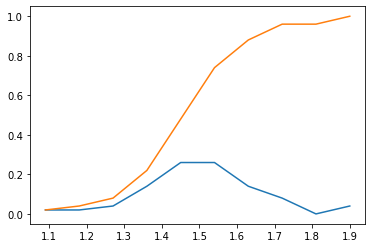

In [18]:
#Plot PDF & CDF of petal_length
counts, bin_edges = np.histogram(iris_setosa['petal.length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)



Here blue curve represents the pdf and orange curve represents the cdf. PDF represents how many points are there in X-axis(at perticular) range, and CDF represents thatWhat percentage of flowers that you read on y-axis less than or equal to the value corresponding to the X-axis.Let us consider a point 1.6 cdf says that there are 82% of setosa flowers that have petal length<=1.6

[0.02 0.02 0.04 0.14 0.26 0.26 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.02 0.04 0.14 0.26 0.26 0.14 0.08 0.   0.04]
[4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]
[0.02 0.02 0.04 0.14 0.26 0.26 0.14 0.08 0.   0.04]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]


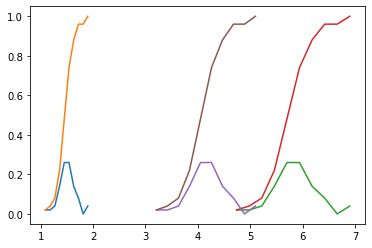

In [19]:
count,bin_edges=np.histogram(iris_setosa["petal.length"],bins=10)
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

count,bin_edges=np.histogram(iris_virginica["petal.length"],bins=10)
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

count, bin_edges=np.histogram(iris_versicolor["petal.length"],bins=10)
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

From this visualization,it is clear that if the PL<2 then it is a Setosa. you can clearly say that 100% of the setosa flowers have the petal length value less than 2, and if PL>2 && PL<=5 then it is Versicolor, here we cna say that 95% of the Versicolor flowers have the petal length value lessthan or equal to 5. If PL>2 && Pl>5 it is Vergininca, but Here 90% of the times iam accurate and of 10% the times i'm going to mistake here.

### Box plot & Violin plots

#### what is box plot and why it is used?

A boxplot is a graph that gives you a good indication of how the values in the data are spread out.Box plot takes a less space and visually represents the five number summary of the data points in a box.

The outliers are displayed as points outside the box.
1. Q1–1.5*IQR
2. Q1 (25th percentile)
3. Q2 (50th percentile or median)
4. Q3 (75th percentile)
5. Q3 + 1.5*IQR
Inter Quartile Range = Q3 -Q1

<AxesSubplot:xlabel='species', ylabel='petal.length'>

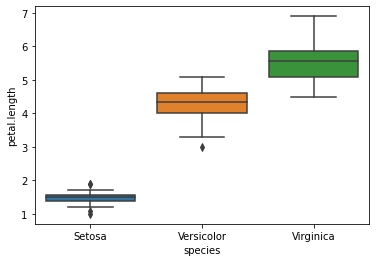

In [20]:
# ploting a box plot
sns.boxplot(x="species",y="petal.length",data=iris)

#### violin plots

A violin plot is a method of plotting numeric data. Violin plots are similar to box plots, except that they also show the probability density of the data at different values, usually smoothed by a kernel density estimator. 

<AxesSubplot:xlabel='species', ylabel='petal.length'>

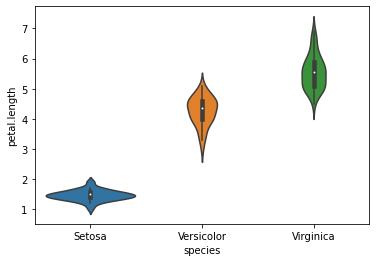

In [21]:
# ploting a violin plot
sns.violinplot(x="species", y="petal.length", data=iris, size=8)

## Bivaraite Analysis

### Scatter plots

A Scatter Plot has points(XY) that show the relationship between two sets of data. Scatter plots show how much one variable is affected by another.

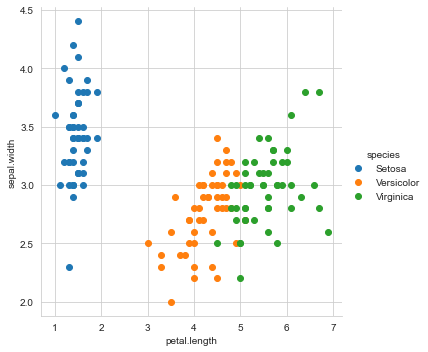

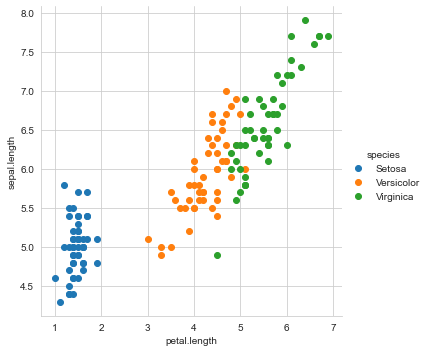

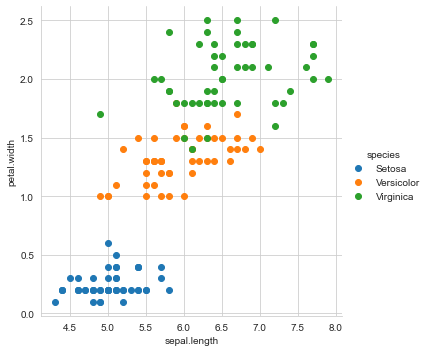

In [22]:
#plot a scatter plot
sns.set_style("whitegrid")
sns.FacetGrid(iris,hue="species",height=5).map(plt.scatter,"petal.length","sepal.width").add_legend()
sns.FacetGrid(iris,hue="species",height=5).map(plt.scatter,"petal.length","sepal.length").add_legend()
sns.FacetGrid(iris,hue="species",height=5).map(plt.scatter,"sepal.length","petal.width").add_legend()


### pair plots

Pair Plots are  simple way to visualize relationships between each variable. It produces a matrix of relationships between each variable in your data for an instant examination of our data.

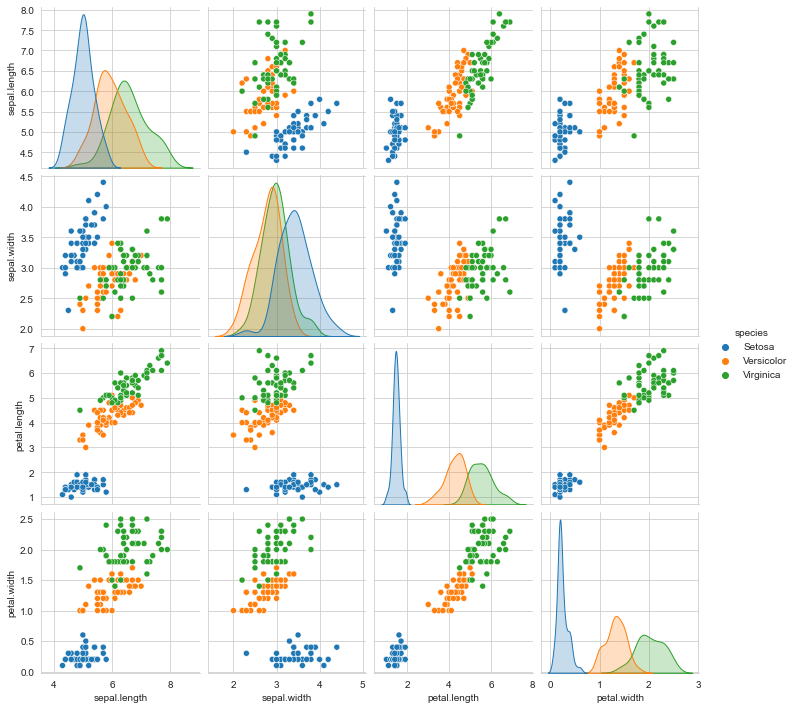

In [23]:
sns.pairplot(iris,hue="species")

The variables petal.length and petal.width are efficient than other variables. By the help of petal length and petal width we can clearly say that Setosa is well separated and Versicolor and Virginica have some overlap.